In [192]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

In [4]:
t0 = time.time()
data_dir = '../data/'
file = 'online_retail.xlsx'
df_origin = pd.read_excel(data_dir + file)
print('Load in ', time.time() - t0)

Load in  49.07540512084961


In [7]:
data_dir = '../data/'
file = 'online_retail.csv'
df_origin.to_csv(data_dir + file, index=False)

In [193]:
t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  1.6959550380706787


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [246]:
df_sales.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


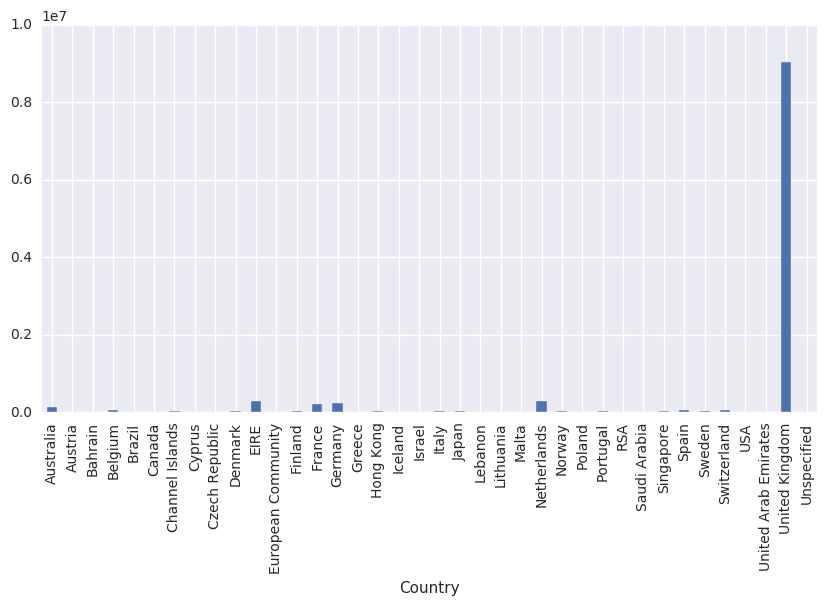

In [195]:
# 各国の売上
# NOTE:
# やはり UK は多い。

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize)
plt.show()

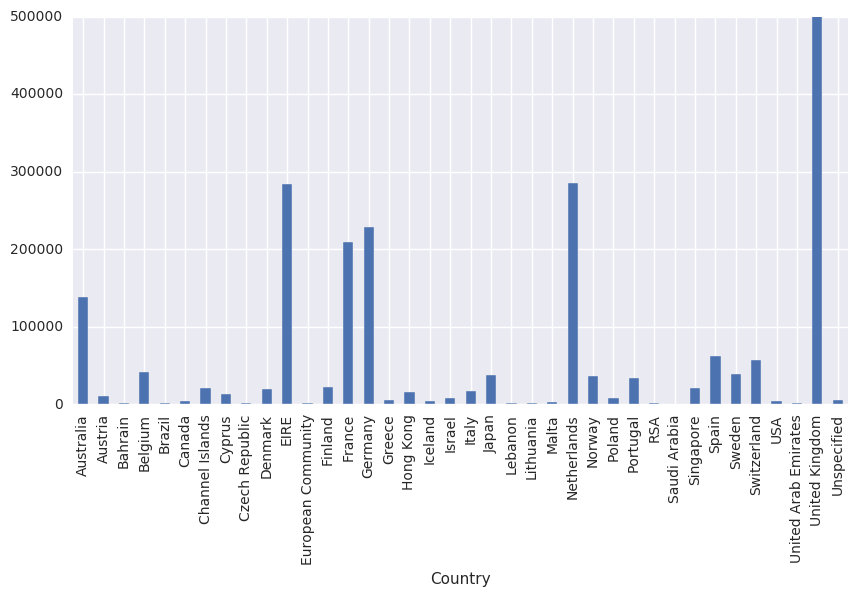

In [196]:
# 各国の売上, UK 以外

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize)
plt.ylim(0, 500000)
plt.show()

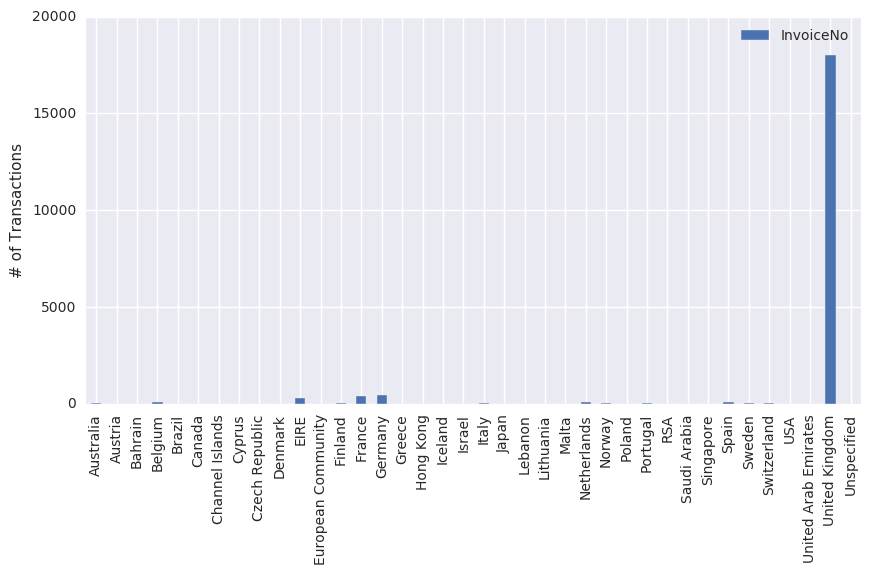

In [197]:
# 各国のトランザクション数

df_transactions_per_country = \
pd.DataFrame(df_sales.groupby('Country')['InvoiceNo'].nunique())

figsize = (10, 5)
df_transactions_per_country.plot(kind='bar', figsize=figsize)
plt.xlabel('')
plt.ylabel('# of Transactions')
plt.show()

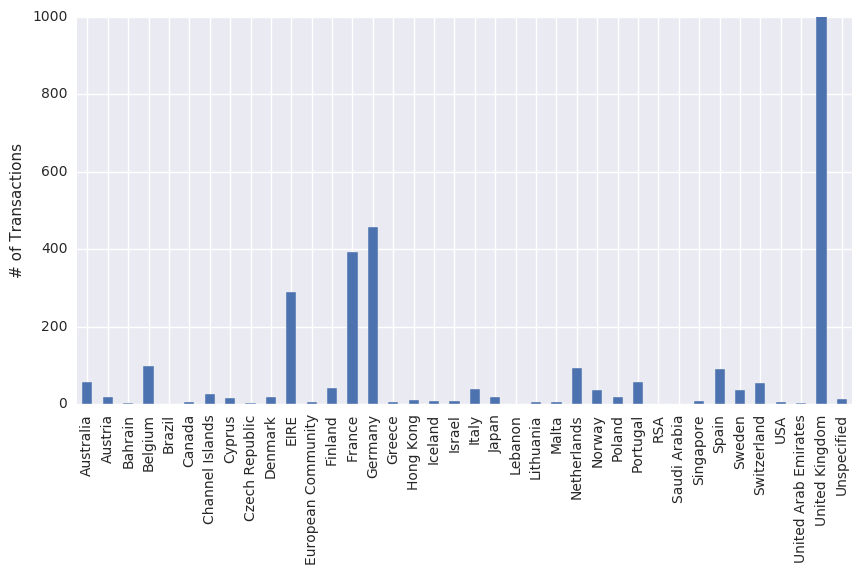

In [198]:
# 各国のトランザクション数, UK 以外

df_transactions_per_country = pd.DataFrame(df_sales.groupby('Country')['InvoiceNo'].nunique())

figsize = (10, 5)
df_transactions_per_country.plot(kind='bar', figsize=figsize)
plt.ylim(0, 1000)
plt.xlabel('')
plt.ylabel('# of Transactions')
plt.legend('')
plt.show()

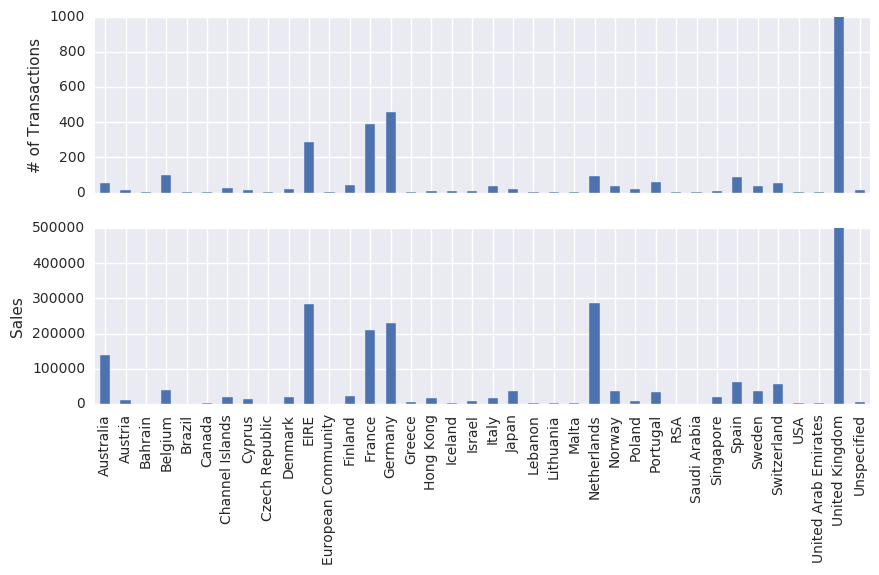

In [199]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

# 上段: トランザクション数
df_transactions_per_country.plot(kind='bar', ax=ax1)
ax1.set_ylim(0, 1000)
ax1.set_xlabel('')
ax1.set_ylabel('# of Transactions')
ax1.legend('')

# 下段: 売上
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', ax=ax2)
ax2.set_ylim(0, 500000)
ax2.set_xlabel('')
ax2.set_ylabel('Sales')

plt.savefig('国別_総トランザクション数_総売上.png')
plt.show()

In [143]:
df_per_country = pd.DataFrame(df_sales.groupby(['Country'])['Sales'].sum())
df_per_country['#ofTransaction'] = df_transactions_per_country['InvoiceNo']
df_per_country['QuantitySum'] = pd.DataFrame(df_sales.groupby('Country')['Quantity'].sum())['Quantity']

# 各国の 1トランザクションあたりの平均売上
df_per_country['Sales/Transaction'] = df_per_country['Sales'] / df_per_country['#ofTransaction']
# 1商品あたりの売上
df_per_country['Sales/Quantity'] = df_per_country['Sales'] / df_per_country['QuantitySum']

display(df_per_country.head())
display(df_per_country.describe())

,Sales,#ofTransaction,QuantitySum,Sales/Transaction,Sales/Quantity
Country,,,,,
Australia,138521.31,57,83901,2430.198421,1.651009
Austria,10198.68,17,4881,599.922353,2.089465
Bahrain,754.14,3,314,251.380000,2.401720
Belgium,41196.34,98,23237,420.370816,1.772877
Brazil,1143.60,1,356,1143.600000,3.212360


,Sales,#ofTransaction,QuantitySum,Sales/Transaction,Sales/Quantity
count,3.800000e+01,38.000000,3.800000e+01,38.000000,38.000000
mean,2.807022e+05,525.315789,1.470625e+05,914.997116,2.157685
std,1.458940e+06,2916.681835,7.536770e+05,691.571644,0.720865
min,1.459200e+02,1.000000,8.000000e+01,145.920000,1.063613
25%,2.939290e+03,5.000000,1.125750e+03,500.806762,1.785658
50%,1.464109e+04,16.500000,5.061000e+03,659.141722,1.964048
75%,3.813784e+04,50.750000,2.532125e+04,1044.032708,2.376740
max,9.025222e+06,18021.000000,4.662390e+06,3039.898571,4.388290


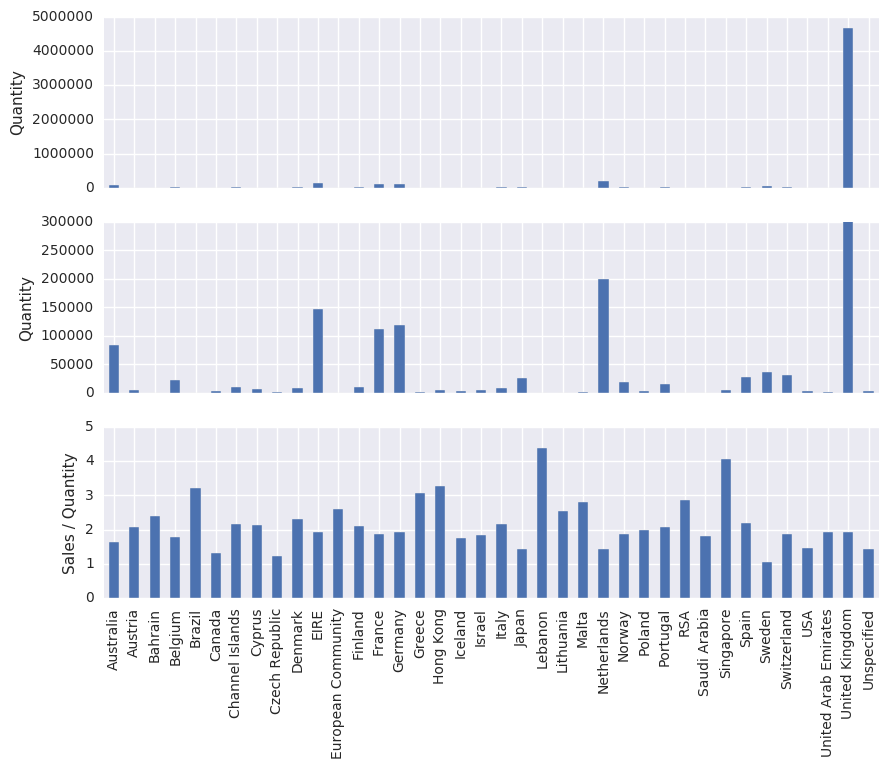

In [140]:
# Quantity の多い Country

figsize = (10, 7.5)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=figsize, sharex=True)

# 全体
y = 'QuantitySum'
df_per_country.plot(kind='bar', y=y, ax=ax1)
ax1.set_ylabel('Quantity')
ax1.legend('')

# UK 以外
y = 'QuantitySum'
df_per_country.plot(kind='bar', y=y, ax=ax2)
ax2.set_ylim(0, 500000)
ax2.set_ylabel('Quantity')
ax2.legend('')

# 1商品あたりの平均売上
y = 'Sales/Quantity'
df_per_country.plot(kind='bar', y=y, ax=ax3)
ax3.set_ylim(0, 5)
ax3.set_xlabel('')
ax3.set_ylabel('Sales / Quantity')
ax3.legend('')

plt.savefig('国別_Quantity_SalesPerQuantity.png')
plt.show()


# NOTE:
# Quantity が比較的多いが Sales/Quantity が低い County に対して、
# 現状購入されている商品と類似しているがより高価な代替商品を売ると、売上の増加が見込めるのではないか？
# 対象となる Country: Australia, EIRE, France, Germany, Netherlands

In [148]:
# 商品数/トランザクション数 を定義
df_per_country['Quantity/Transaction'] = df_per_country['QuantitySum'] / df_per_country['#ofTransaction']

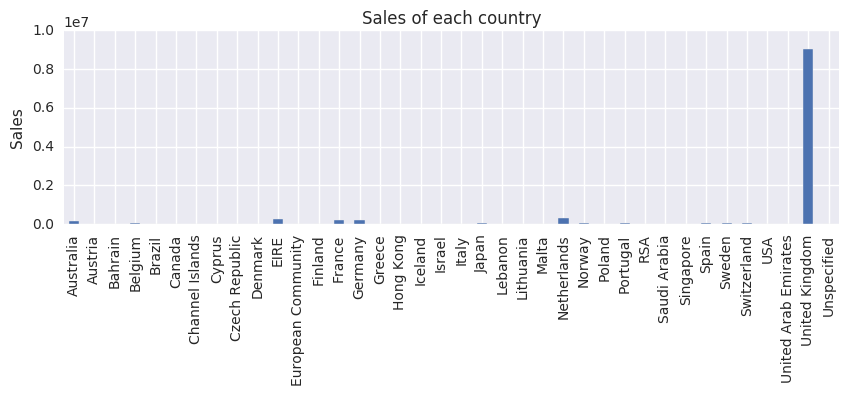

In [200]:
# 売上, 売上/商品数, 商品数/トランザクション数, トランザクション数

# 売上
figsize = (10, 2.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize, sharex=True)

# 売上
y = 'Sales'
df_per_country.plot(kind='bar', y=y, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Sales')
ax1.set_title('Sales of each country')
ax1.legend('')

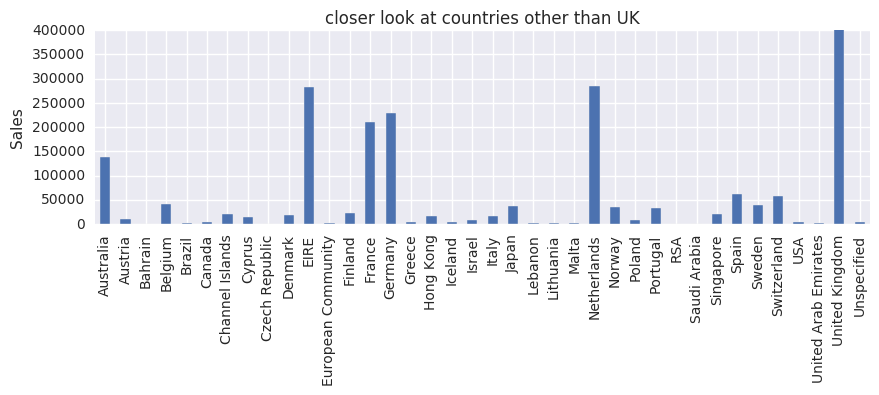

In [201]:
figsize = (10, 2.5)
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=figsize, sharex=True)

# 売上 UK 以外に注目
y = 'Sales'
df_per_country.plot(kind='bar', y=y, ax=ax2)
ax2.set_ylim(0, 400000)
ax2.set_xlabel('')
ax2.set_ylabel('Sales')
ax2.set_title('closer look at countries other than UK')
ax2.legend('')

plt.savefig('国別_Sales.png')
plt.show()

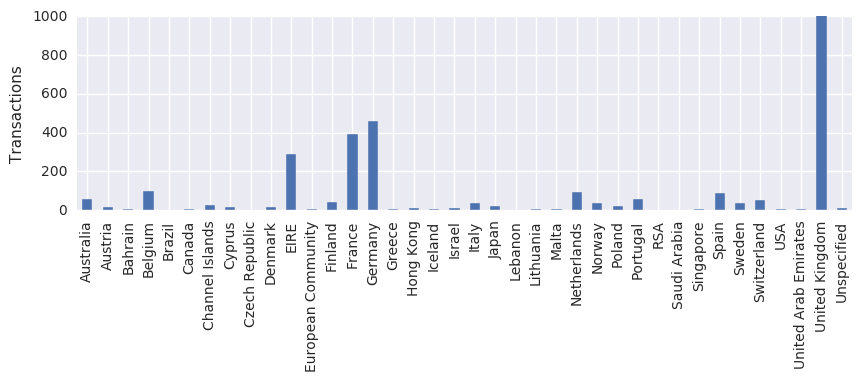

In [203]:
# # of Transactions

# 売上/商品数, 商品数/トランザクション数, トランザクション数
figsize = (10, 2.5)
fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=figsize, sharex=True)

# トランザクション数
y = '#ofTransaction'
df_per_country.plot(kind='bar', y=y, ax=ax3)
ax3.set_ylim(0, 1000)
ax3.set_xlabel('')
ax3.set_ylabel('Transactions')
ax3.legend('')

plt.show()

In [223]:
df_per_country['#ofCustomers'] = df_sales.groupby('Country')['CustomerID'].nunique()
display(df_per_country.head())

,Sales,#ofTransaction,QuantitySum,Sales/Transaction,Sales/Quantity,Quantity/Transaction,#ofCustomers
Country,,,,,,,
Australia,138521.31,57,83901,2430.198421,1.651009,1471.947368,9
Austria,10198.68,17,4881,599.922353,2.089465,287.117647,11
Bahrain,754.14,3,314,251.380000,2.401720,104.666667,2
Belgium,41196.34,98,23237,420.370816,1.772877,237.112245,25
Brazil,1143.60,1,356,1143.600000,3.212360,356.000000,1


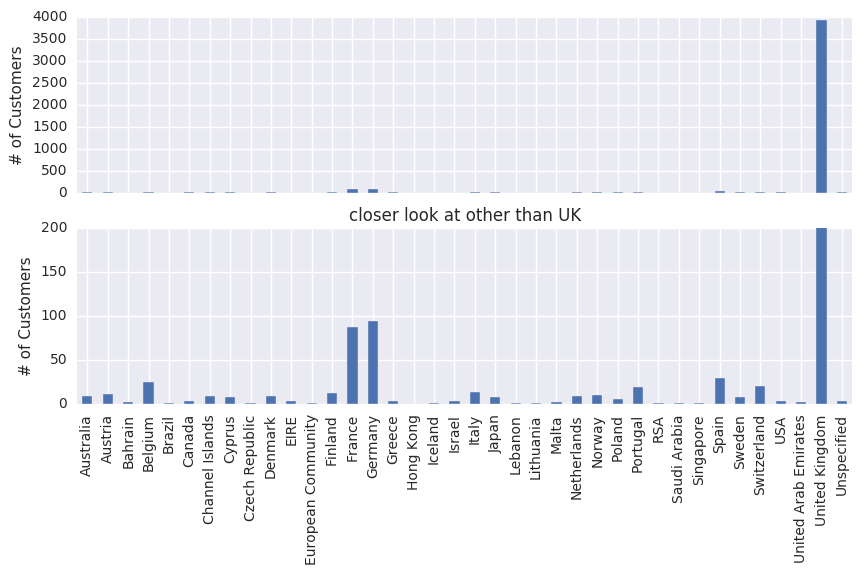

In [242]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

df_per_country['#ofCustomers'].plot(kind='bar', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('# of Customers')

df_per_country['#ofCustomers'].plot(kind='bar', ax=ax2)
ax2.set_ylim(0, 200)
ax2.set_xlabel('')
ax2.set_ylabel('# of Customers')
ax2.set_title('closer look at other than UK')

plt.show()

In [232]:
# Transaction / Customer
df_per_country['Transaction/Customer'] = df_per_country['#ofTransaction'] / df_per_country['#ofCustomers']
display(df_per_country.head(3))

,Sales,#ofTransaction,QuantitySum,Sales/Transaction,Sales/Quantity,Quantity/Transaction,#ofCustomers,TransactionPerCustomer,Transaction/Customer
Country,,,,,,,,,
Australia,138521.31,57,83901,2430.198421,1.651009,1471.947368,9,6.333333,6.333333
Austria,10198.68,17,4881,599.922353,2.089465,287.117647,11,1.545455,1.545455
Bahrain,754.14,3,314,251.380000,2.401720,104.666667,2,1.500000,1.500000


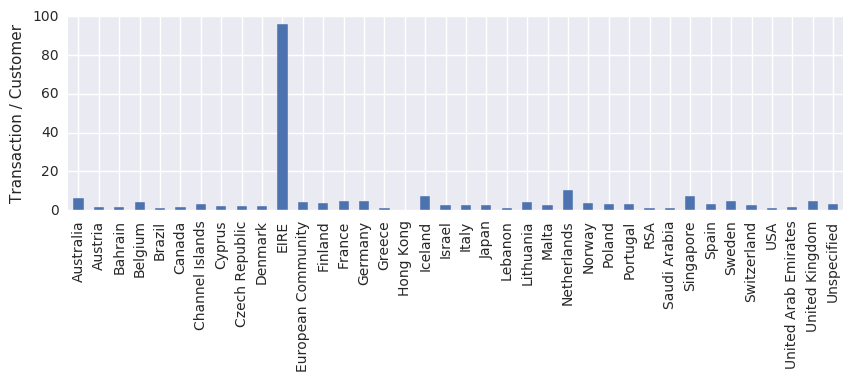

In [236]:
figsize = (10, 2.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)

df_per_country['Transaction/Customer'].plot(kind='bar', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Transaction / Customer')

plt.show()

# NOTE:
# UK, Transaction / Customer 小さい。

In [245]:
df_per_country.loc['United Kingdom']

Sales                     9.025222e+06
#ofTransaction            1.802100e+04
QuantitySum               4.662390e+06
Sales/Transaction         5.008169e+02
Sales/Quantity            1.935750e+00
Quantity/Transaction      2.587198e+02
#ofCustomers              3.920000e+03
TransactionPerCustomer    4.597194e+00
Transaction/Customer      4.597194e+00
Name: United Kingdom, dtype: float64

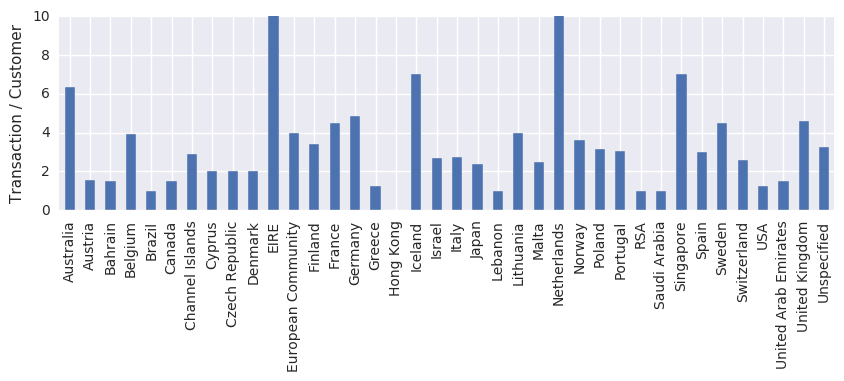

In [244]:
figsize = (10, 2.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)

df_per_country['Transaction/Customer'].plot(kind='bar', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Transaction / Customer')
ax1.set_ylim(0, 10)

plt.show()

# NOTE:
# UK, Transaction / Customer = 4 くらい。

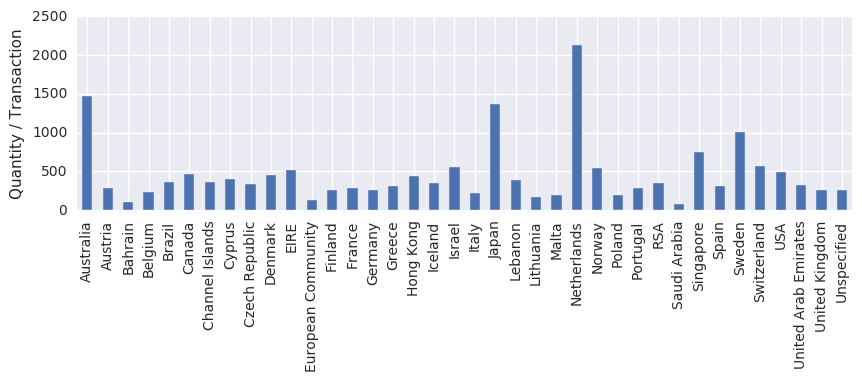

In [205]:
# 売上, 売上/商品数, 商品数/トランザクション数, トランザクション数

# 売上/商品数, 商品数/トランザクション数, トランザクション数
figsize = (10, 2.5)
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=figsize, sharex=True)

# 商品数/トランザクション
y = 'Quantity/Transaction'
df_per_country.plot(kind='bar', y=y, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Quantity / Transaction')
ax2.legend('')

plt.show()

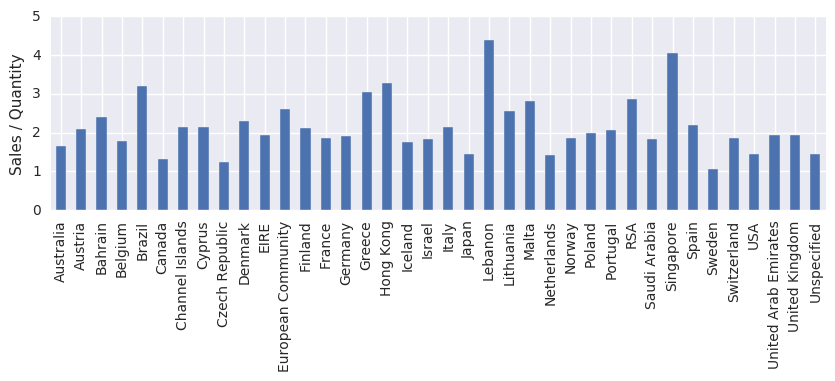

In [204]:
# 売上, 売上/商品数, 商品数/トランザクション数, トランザクション数

# 売上/商品数, 商品数/トランザクション数, トランザクション数
figsize = (10, 2.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize, sharex=True)

# 売上/商品数
y = 'Sales/Quantity'
df_per_country.plot(kind='bar', y=y, ax=ax1)
ax1.set_ylim(0, 5)
ax1.set_xlabel('')
ax1.set_ylabel('Sales / Quantity')
ax1.legend('')

plt.show()

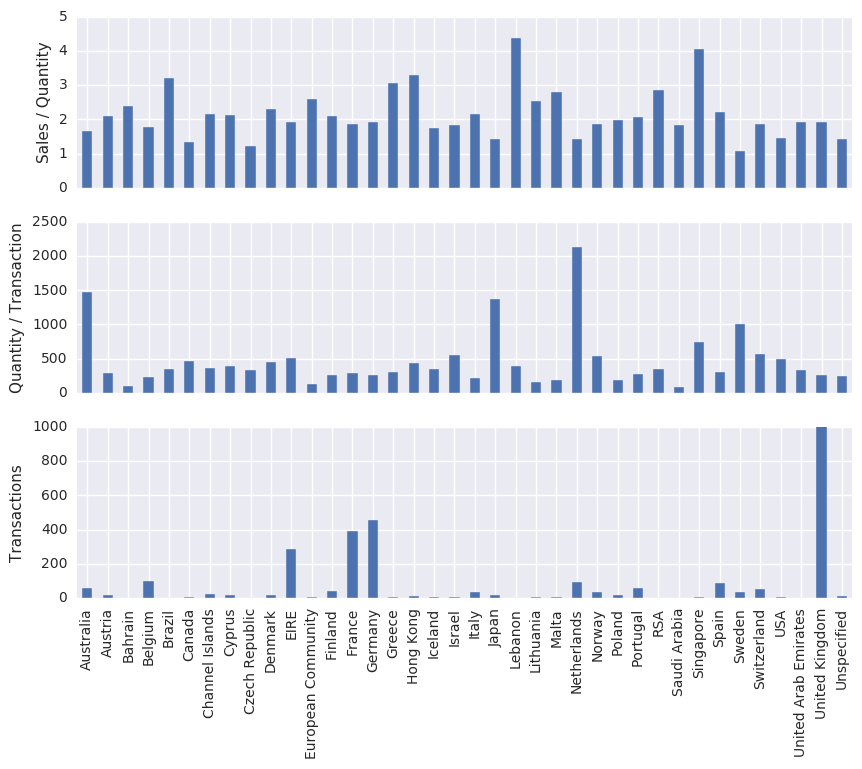

In [160]:
# 売上, 売上/商品数, 商品数/トランザクション数, トランザクション数

# 売上/商品数, 商品数/トランザクション数, トランザクション数
figsize = (10, 7.5)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=figsize, sharex=True)

# 売上/商品数
y = 'Sales/Quantity'
df_per_country.plot(kind='bar', y=y, ax=ax1)
ax1.set_ylim(0, 5)
ax1.set_xlabel('')
ax1.set_ylabel('Sales / Quantity')
ax1.legend('')

# 商品数/トランザクション
y = 'Quantity/Transaction'
df_per_country.plot(kind='bar', y=y, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Quantity / Transaction')
ax2.legend('')

# トランザクション数
y = '#ofTransaction'
df_per_country.plot(kind='bar', y=y, ax=ax3)
ax3.set_ylim(0, 1000)
ax3.set_xlabel('')
ax3.set_ylabel('Transactions')
ax3.legend('')

plt.savefig('国別_SalesPerQuantity_QuatityPerTransaction_Transactions.png')
plt.show()

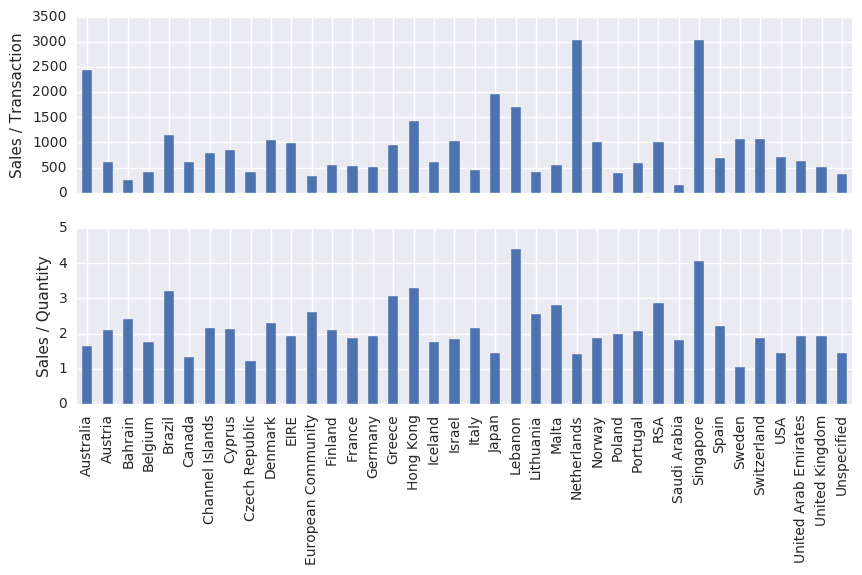

In [138]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

# 上段: 1トランザクションあたりの平均売上　
df_per_country.plot(kind='bar', y='Sales/Transaction', ax=ax1)
ax1.set_ylim(0, 3500)
ax1.set_xlabel('')
ax1.set_ylabel('Sales / Transaction')
ax1.legend('')

# 下段: 1商品あたりの平均売上　
df_per_country.plot(kind='bar', y='UnitPriceMean', ax=ax2)
ax2.set_ylim(0, 5)
ax2.set_xlabel('')
ax2.set_ylabel('Sales / Quantity')
ax2.legend('')

plt.savefig('国別_1トランザクションあたりの売上_1商品あたりの売上.png')
plt.show()

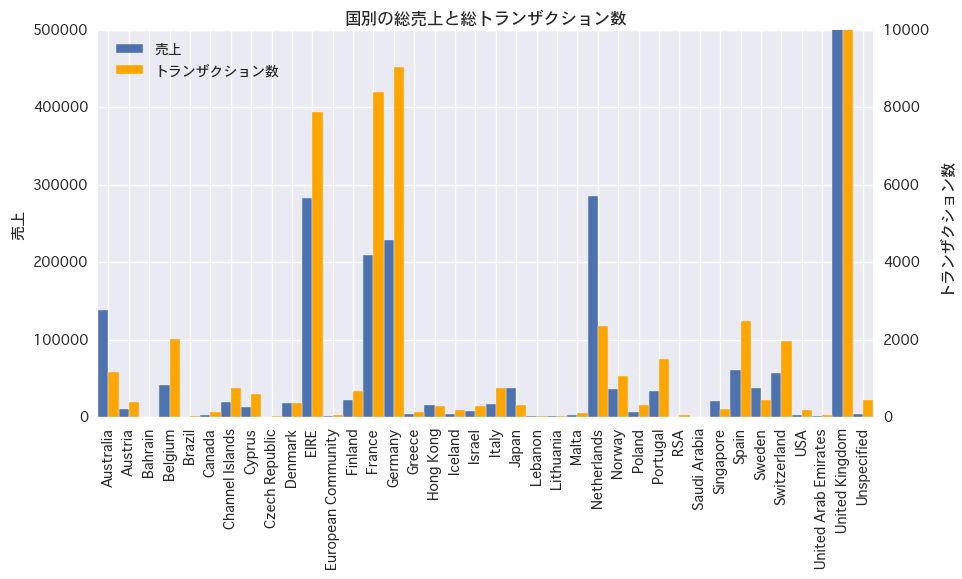

In [82]:
# NOTE: 
# このプロットはよくない。
# Bar plot を 2つ横に並べるのは、前年 / 当年の比較とかであればよさそう。

# 売上

figsize = (10, 5)
fig, ax = plt.subplots(figsize=figsize)

ind = np.arange(df_sales['Country'].nunique())
w = 0.5
countries = df_sales.groupby('Country').size().index

#df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize, ax=ax, x=ind, width=w)
rect1 = ax.bar(ind, df_sales.groupby(['Country'])['Sales'].sum(), width=w)
ax.set_ylim(0, 500000)
ax.set_ylabel('売上')

# トランザクション数
ax2 = ax.twinx()
#df_sales.groupby('Country').size().plot(kind='bar', figsize=figsize, ax=ax2, x=ind + w, width=w, color='orange')
rect2 = ax2.bar(ind + w, df_sales.groupby('Country').size(), width=w, color='orange')
ax2.set_ylim(0, 10000)
ax2.set_ylabel('トランザクション数')
ax2.grid(b=False)

ax.set_xlim(0, len(ind))
ax.set_xticks(ind + w)
ax.set_xticklabels(countries, rotation=90)

ax.legend((rect1[0], rect2[0]), ('売上', 'トランザクション数'), bbox_to_anchor=(0.25, 1))
ax.set_title('国別の総売上と総トランザクション数')

plt.show()

In [53]:
df_sales_by_country_customer = \
pd.DataFrame(df_sales.groupby(['Country', 'CustomerID'])['Sales'].sum()).reset_index()
df_sales_by_country_customer.head()

,Country,CustomerID,Sales
0,Australia,12386.0,401.90
1,Australia,12388.0,2780.66
2,Australia,12393.0,1582.60
3,Australia,12415.0,124914.53
4,Australia,12422.0,386.20


In [188]:
df_per_country_customer = \
pd.DataFrame(df_sales.groupby(['Country', 'CustomerID'])['Sales'].sum()).reset_index()

In [191]:
df_per_country_customer['#ofTransactions'] = \
pd.DataFrame(df_sales.groupby(['Country', 'CustomerID'])['InvoiceNo'].nunique()).reset_index()['InvoiceNo']
df_per_country_customer.head()

,Country,CustomerID,Sales,#ofTransactions
0,Australia,12386.0,401.90,2
1,Australia,12388.0,2780.66,6
2,Australia,12393.0,1582.60,4
3,Australia,12415.0,124914.53,21
4,Australia,12422.0,386.20,2


## 各 Country の 各 Customer の売上の構成比

In [177]:
def plot_customer_ratio_in(country):
    df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
    df_the_country['Sales_%'] = \
    (df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
    
    figsize = (10, 2.5)
    x = 'CustomerID'
    y = 'Sales_%'
    df_the_country.sort_values('Sales', ascending=False).plot(kind='bar', x=x, y=y, figsize=figsize)
    plt.xlabel('CustomerID')
    plt.ylabel('Sales ratio (%)')
    plt.legend('')
    plt.show()

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


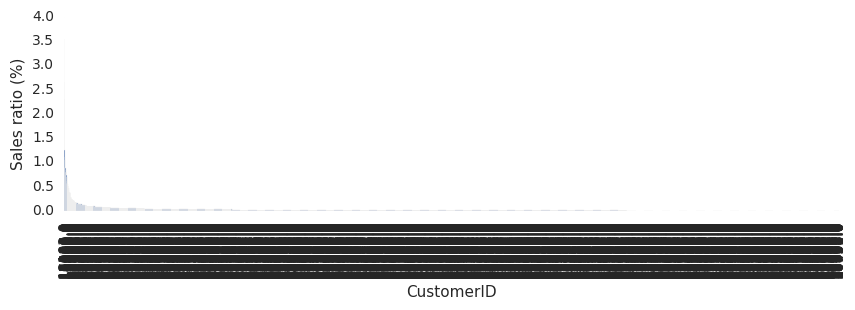

In [184]:
plot_customer_ratio_in('United Kingdom')

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


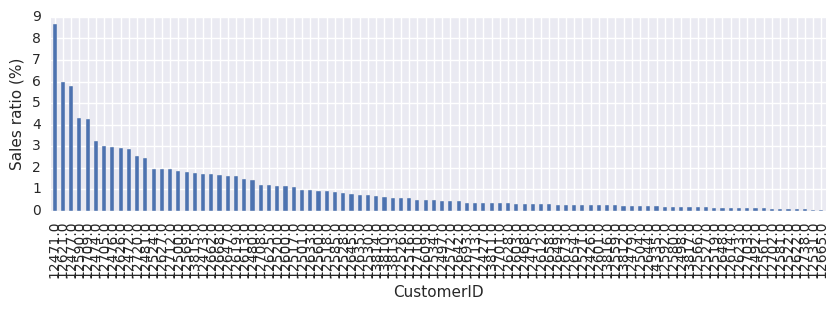

In [181]:
plot_customer_ratio_in('Germany')

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


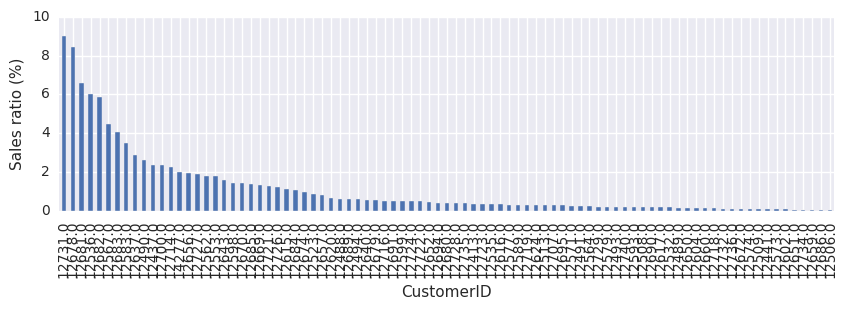

In [180]:
plot_customer_ratio_in('France')

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


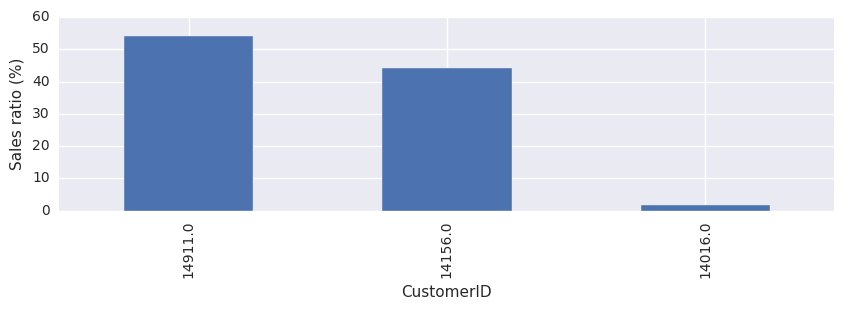

In [182]:
plot_customer_ratio_in('EIRE')

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


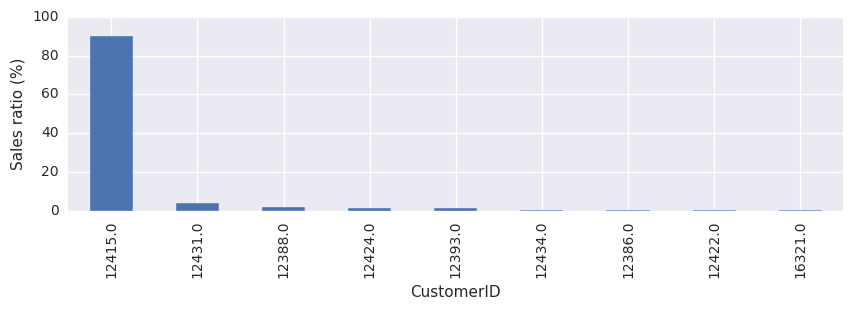

In [178]:
plot_customer_ratio_in('Australia')

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


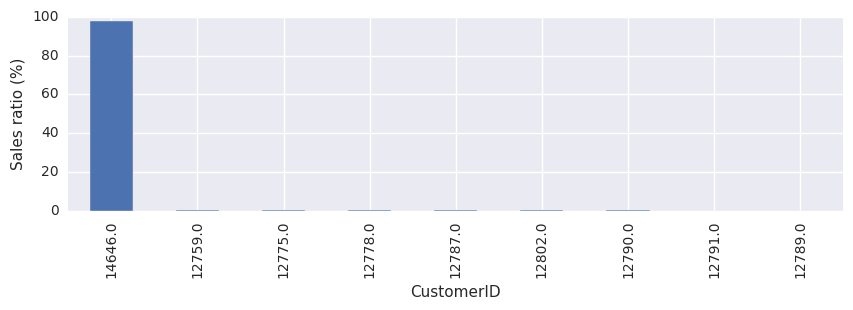

In [183]:
plot_customer_ratio_in('Netherlands')

In [66]:
# 各国の 各 Customer　の構成比
country = 'Singapore'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
356,Singapore,12744.0,21279.29,100.0


In [70]:
# 各国の 各 Customer　の構成比
country = 'Netherlands'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
318,Netherlands,14646.0,280206.02,98.164166
310,Netherlands,12759.0,1531.44,0.536507
311,Netherlands,12775.0,1386.04,0.485569
312,Netherlands,12778.0,822.23,0.288051
313,Netherlands,12787.0,463.66,0.162433
317,Netherlands,12802.0,427.58,0.149793
315,Netherlands,12790.0,324.92,0.113829
316,Netherlands,12791.0,192.60,0.067473
314,Netherlands,12789.0,91.85,0.032178


In [67]:
# 各国の 各 Customer　の構成比
country = 'Sweden'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
394,Sweden,17404.0,31906.82,83.137594
387,Sweden,12483.0,2484.98,6.474956
391,Sweden,12676.0,1331.39,3.469119
392,Sweden,12697.0,957.59,2.495132
388,Sweden,12638.0,671.69,1.750180
389,Sweden,12639.0,486.10,1.266600
393,Sweden,12715.0,353.86,0.922031
390,Sweden,12641.0,185.90,0.484388


In [69]:
# 各国の 各 Customer　の構成比
country = 'Japan'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
298,Japan,12753.0,21429.39,57.272766
304,Japan,12798.0,6977.04,18.647025
300,Japan,12755.0,3811.95,10.187920
299,Japan,12754.0,3010.74,8.046585
303,Japan,12770.0,1351.45,3.611922
302,Japan,12763.0,494.08,1.320492
305,Japan,12812.0,229.64,0.613742
301,Japan,12756.0,112.08,0.299548


In [24]:
# 重要顧客を識別する
# その顧客の売上の全体に占める比率が高い顧客

df_sales_by_customer = pd.DataFrame(df_sales.groupby('CustomerID')['Sales'].sum()).reset_index()
print('# of Customers = ', df_sales_by_customer.shape[0])

# of Customers =  4338


In [28]:
df_sales_by_customer['Sales_%'] = \
(df_sales_by_customer['Sales'] / df_sales_by_customer['Sales'].sum()) * 100
df_sales_by_customer.head()

,CustomerID,Sales,Sales_%
0,12346.0,77183.60,0.866121
1,12347.0,4310.00,0.048365
2,12348.0,1797.24,0.020168
3,12349.0,1757.55,0.019722
4,12350.0,334.40,0.003752


In [80]:
df_sales_by_customer_sorted = \
df_sales_by_customer.sort_values('Sales', ascending=False)
df_sales_by_customer_sorted.head()

,CustomerID,Sales,Sales_%
1689,14646.0,280206.02,3.144352
4201,18102.0,259657.30,2.913763
3728,17450.0,194550.79,2.183166
3008,16446.0,168472.50,1.890526
1879,14911.0,143825.06,1.613943


In [79]:
# Customer と Country の対応 (ただし Country が複数ある Customer は無視している)
df_customer_country = \
pd.DataFrame(df_origin.groupby('CustomerID')['Country'].max()).reset_index()
df_customer_country.head()

,CustomerID,Country
0,12346.0,United Kingdom
1,12347.0,Iceland
2,12348.0,Finland
3,12349.0,Italy
4,12350.0,Norway


In [86]:
# 売上上位 10 の顧客の Country
# NOTE:
# 売上1位, Netherlands 売上1位の 14646 と 
# 売上6位, Australia 売上1位の 12415 に注目された。

df_sales_by_customer_sorted.set_index('CustomerID')\
.join(df_customer_country.set_index('CustomerID'), how='left').head(10)

,Sales,Sales_%,Country
CustomerID,,,
14646.0,280206.02,3.144352,Netherlands
18102.0,259657.30,2.913763,United Kingdom
17450.0,194550.79,2.183166,United Kingdom
16446.0,168472.50,1.890526,United Kingdom
14911.0,143825.06,1.613943,EIRE
12415.0,124914.53,1.401737,Australia
14156.0,117379.63,1.317184,EIRE
17511.0,91062.38,1.021863,United Kingdom
16029.0,81024.84,0.909226,United Kingdom


## Country を複数持つ Customer

In [48]:
# Country を複数持つ Customer
# NOTE:
# なぜ Country を複数持つのか？ は置いておく。
# これらの顧客は Sales 上位の顧客ではないので、影響は小さいのではないか？

df_customer_country = pd.DataFrame(df_sales.groupby('CustomerID')['Country'].nunique())
df_customer_country[df_customer_country['Country'] > 1]

,Country
CustomerID,
12370.0,2
12394.0,2
12417.0,2
12422.0,2
12429.0,2
12431.0,2
12455.0,2
12457.0,2


In [42]:
# 顧客の中には Country が複数ある顧客もいる
# この顧客は途中で Country が変更したわけでもない。

df_sales[df_sales['CustomerID'] == 12370.0]['Country'].unique()
display(df_sales[(df_sales['CustomerID'] == 12370.0) & (df_sales['Country'] == 'Austria')])
display(df_sales[(df_sales['CustomerID'] == 12370.0) & (df_sales['Country'] == 'Cyprus')].tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
33511,539330,37449,CERAMIC CAKE STAND + HANGING CAKES,8,2010-12-17 09:38:00,8.50,12370.0,Austria,68.0
33512,539330,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-17 09:38:00,1.45,12370.0,Austria,11.6
33513,539330,22962,JAM JAR WITH PINK LID,12,2010-12-17 09:38:00,0.85,12370.0,Austria,10.2
33514,539330,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,4,2010-12-17 09:38:00,4.25,12370.0,Austria,17.0
33515,539330,22113,GREY HEART HOT WATER BOTTLE,4,2010-12-17 09:38:00,3.75,12370.0,Austria,15.0
33516,539330,22313,OFFICE MUG WARMER PINK,6,2010-12-17 09:38:00,2.95,12370.0,Austria,17.7
33517,539330,22312,OFFICE MUG WARMER POLKADOT,6,2010-12-17 09:38:00,2.95,12370.0,Austria,17.7
33518,539330,POST,POSTAGE,3,2010-12-17 09:38:00,40.00,12370.0,Austria,120.0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
398023,571905,22571,ROCKING HORSE RED CHRISTMAS,12,2011-10-19 14:51:00,0.85,12370.0,Cyprus,10.20
398024,571905,22154,ANGEL DECORATION 3 BUTTONS,48,2011-10-19 14:51:00,0.42,12370.0,Cyprus,20.16
398025,571905,22575,METAL MERRY CHRISTMAS WREATH,8,2011-10-19 14:51:00,1.95,12370.0,Cyprus,15.60
398026,571905,23210,WHITE ROCKING HORSE HAND PAINTED,24,2011-10-19 14:51:00,1.25,12370.0,Cyprus,30.00
398027,571905,23213,STAR WREATH DECORATION WITH BELL,12,2011-10-19 14:51:00,1.25,12370.0,Cyprus,15.00
